# Data exploration

Using the Banking Dataset - Marketing Targets (https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets), we want to predict to predict if customers will convert or not to a Protuguese Bank.


In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sklearn as skl
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Example: list contents of a folder
folder_path = '/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/data'
print(os.listdir(folder_path))

['train.csv', 'test.csv']


In [4]:
# Load csv files
file_1 = Path("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/data/train.csv")
file_2 = Path("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/data/test.csv")

#Read and display
data_df_1 = pd.read_csv(file_1, sep=";")
data_df_2 = pd.read_csv(file_2, sep=";")

In [5]:
data_df_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data_df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#Combine two datasets
combined_df = pd.concat([data_df_1, data_df_2], axis=0)
combined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Descriptive Statistics

In [8]:
combined_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
pip install -U kaleido


In [10]:
import plotly.express as px

In [11]:
# Histogram of age
fig = px.histogram(combined_df, x="age", nbins=20, color="marital")
fig.show()

fig.write_image("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/age_plot.png", scale=2)


In [12]:
# Bar chart - marital status
marital_counts = combined_df['marital'].value_counts().reset_index()
marital_counts.columns = ['marital', 'count']

# Create the bar plot
marital_status_plot = px.bar(marital_counts, x='count', y='marital')
marital_status_plot.show()

marital_status_plot.write_image("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/marital_plot.png", scale=2)


In [13]:
# Bar chart - education
education_counts = combined_df['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

# Create the bar plot
education_plot = px.bar(education_counts, x='count', y='education')
education_plot.show()

education_plot.write_image("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/education_plot.png", scale=2)


In [14]:
# Bar chart - job
job_counts = combined_df['job'].value_counts().reset_index()
job_counts.columns = ['job', 'count']

# Create the bar plot
job_plot = px.bar(job_counts, x='count', y='job')
job_plot.show()

job_plot.write_image("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/job_plot.png", scale=2)


In [15]:
# Bar chart - loan
loan_counts = combined_df['loan'].value_counts().reset_index()
loan_counts.columns = ['loan', 'count']

# Create the bar plot
loan_plot = px.bar(loan_counts, x='count', y='loan')
loan_plot.show()

loan_plot.write_image("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/loan_plot.png", scale=2)


In [16]:
# Bar chart - housing
housing_counts = combined_df['housing'].value_counts().reset_index()
housing_counts.columns = ['housing', 'count']

# Create the bar plot
housing_plot = px.bar(housing_counts, x='count', y='housing')
housing_plot.show()

housing_plot.write_image("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/housing_plot.png", scale=2)


#Preparing data

In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [18]:
# Select categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Check the number of unique values in each column
combined_df[categorical_cols].nunique()

,0
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4
y,2


In [19]:
#Convert to dummies categorical columns
df_encoded = pd.get_dummies(combined_df, columns=categorical_cols, dtype=int)

In [20]:
# Deleting innecesary columns for the neural network
df_final = df_encoded.drop(columns=['y_no'])

In [21]:
len(df_final.columns)

52

In [22]:
df_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_yes'],
      dtype='object')

# First Attempt: neural network

In [23]:
# Split our preprocessed data into our features and target arrays
y = df_final['y_yes'].values
X = df_final.drop('y_yes', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 38)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the model.
model_1 = tf.keras.models.Sequential()

# First hidden layer
model_1.add(tf.keras.layers.Dense(units=51, activation="relu", input_dim=51))

# Second hidden layer
model_1.add(tf.keras.layers.Dense(units=25, activation="relu"))

# Output layer
model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 51)                  │           2,652 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
fit_model = model_1.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8546 - loss: 0.3371 - val_accuracy: 0.9029 - val_loss: 0.2212
Epoch 2/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9089 - loss: 0.2112 - val_accuracy: 0.9021 - val_loss: 0.2118
Epoch 3/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9112 - loss: 0.2044 - val_accuracy: 0.9012 - val_loss: 0.2090
Epoch 4/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9142 - loss: 0.1967 - val_accuracy: 0.9034 - val_loss: 0.2075
Epoch 5/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9144 - loss: 0.1951 - val_accuracy: 0.9038 - val_loss: 0.2054
Epoch 6/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9165 - loss: 0.1892 - val_accuracy: 0.9056 - val_loss: 0.2039
Epoch 7/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9177 - loss: 0.1868 - val_accuracy: 0.9024 - val_loss: 0.2056
Epoch 8/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9186 - loss: 0.1830 - val_accu

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

389/389 - 1s - 2ms/step - accuracy: 0.8978 - loss: 0.4699
Loss: 0.46986129879951477, Accuracy: 0.8977720737457275


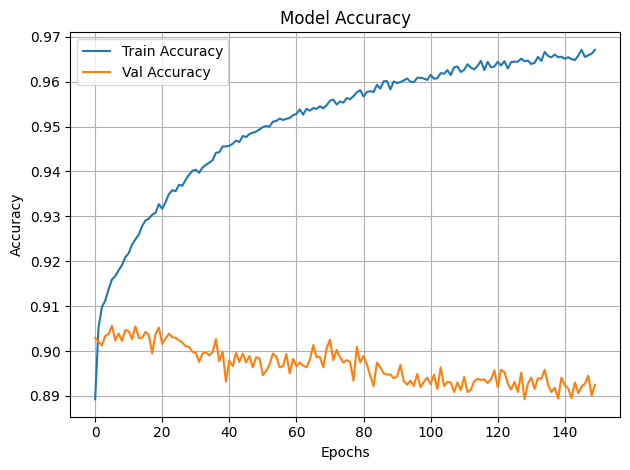

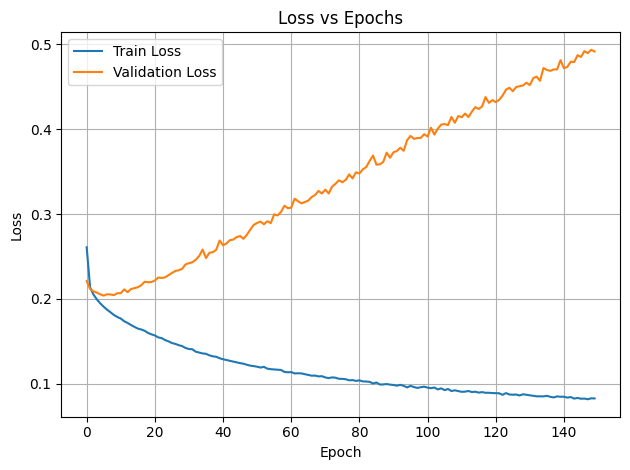

In [29]:
#Plot accuracy and loss
# Accuracy
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history.get('val_accuracy'), label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Model Accuracy')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/model_1_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# Loss
# History of training
history = fit_model.history

# Epoch in chich the training stopped
stopped_epoch = len(history['loss']) - 1


plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/model_1_loss.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Save model
model_1.save("modelo_marketing_v1.h5")


# Optimization of the neural network

In [31]:
# Deleting innecesary columns for the neural network
final_df_reduced = df_final.drop(columns=['job_unknown', 'marital_divorced', 'education_unknown','default_no', 'housing_no', 'loan_no', 'contact_unknown', 'poutcome_unknown'])

In [32]:
final_df_reduced.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'y_yes'],
      dtype='object')

In [33]:
# Print lenght of data frame for the input_dim of the neural network model
len(final_df_reduced.columns)

44

In [34]:
# Final check to the data frame
final_df_reduced.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
# Split our preprocessed data into our features and target arrays
y = final_df_reduced['y_yes'].values
X = final_df_reduced.drop('y_yes', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 38)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Second Model

In [36]:
# Define the model.
model_2 = tf.keras.models.Sequential()

# First hidden layer
model_2.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=43))

# Second hidden layer
model_2.add(tf.keras.layers.Dense(units=22, activation="relu"))

# Output layer
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 43)                  │           1,892 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 22)                  │             968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              23 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the model
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Use of early stop because there was overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [39]:
# Train the model
fit_model = model_2.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, callbacks=[early_stop])

Epoch 1/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8808 - loss: 0.3093 - val_accuracy: 0.8991 - val_loss: 0.2201
Epoch 2/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9016 - loss: 0.2228 - val_accuracy: 0.9025 - val_loss: 0.2134
Epoch 3/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9063 - loss: 0.2113 - val_accuracy: 0.9034 - val_loss: 0.2084
Epoch 4/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9119 - loss: 0.1983 - val_accuracy: 0.9039 - val_loss: 0.2066
Epoch 5/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9096 - loss: 0.2015 - val_accuracy: 0.9038 - val_loss: 0.2070
Epoch 6/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9122 - loss: 0.1959 - val_accuracy: 0.9029 - val_loss: 0.2061
Epoch 7/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9160 - loss: 0.1912 - val_accuracy: 0.9047 - val_loss: 0.2044
Epoch 8/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9165 - loss: 0.1895 - val_accu

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

389/389 - 1s - 3ms/step - accuracy: 0.9052 - loss: 0.2083
Loss: 0.20831117033958435, Accuracy: 0.9051716923713684


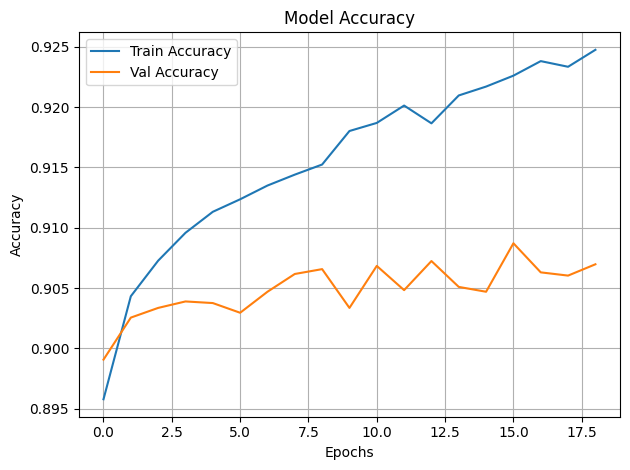

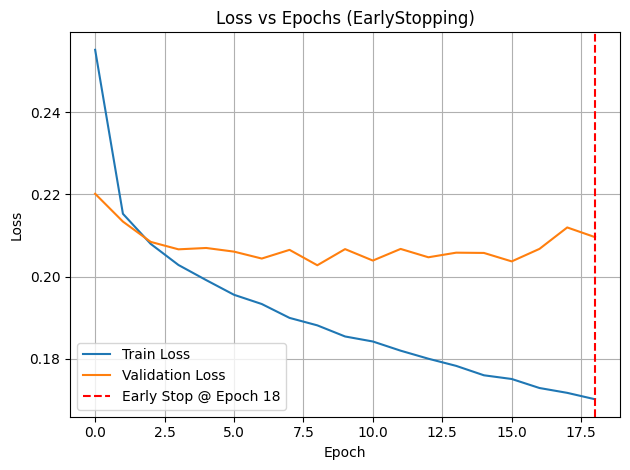

In [41]:
#Plot accuracy and loss
# Accuracy
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history.get('val_accuracy'), label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Model Accuracy')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/model_2_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# Loss
# History of training
history = fit_model.history

# Epoch in chich the training stopped
stopped_epoch = len(history['loss']) - 1


plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')

plt.axvline(stopped_epoch, color='r', linestyle='--', label=f'Early Stop @ Epoch {stopped_epoch}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (EarlyStopping)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/model_2_loss.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
# Save model
model_2.save("modelo_marketing_v2.h5")
